In [61]:
import os
import numpy as np
import matplotlib.pyplot as mp
import scipy as sp
import peakutils.peak as peak
import rawpy as raw
import rawpy.enhance
import imageio
from jupyterthemes import jtplot

In [62]:
jtplot.reset()
mp.style.use("seaborn")
mp.rcParams["axes.axisbelow"] = True
mp.rcParams["text.usetex"] = True
mp.rcParams["font.family"] = "serif"
mp.rcParams["figure.figsize"] = (16/2, 9/2)
mp.rcParams["figure.dpi"] = 100
mp.rcParams["text.latex.preamble"] = [r"\usepackage{physics}"]

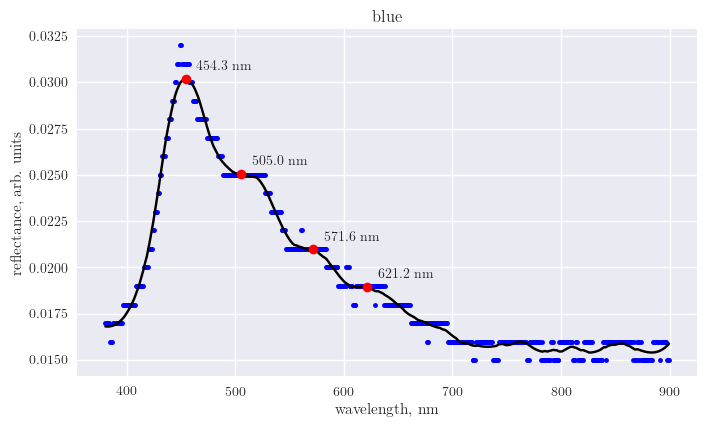

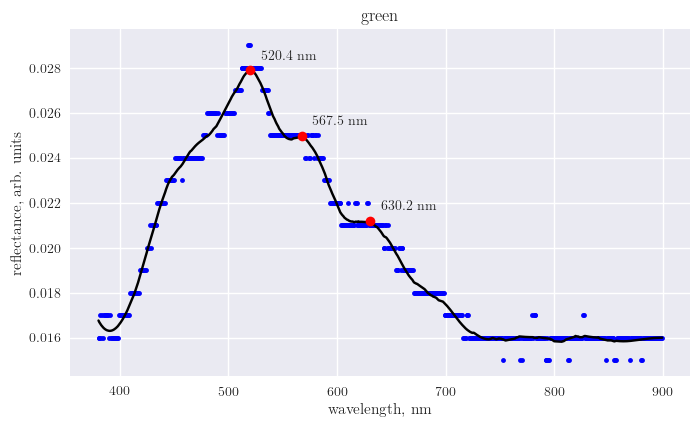

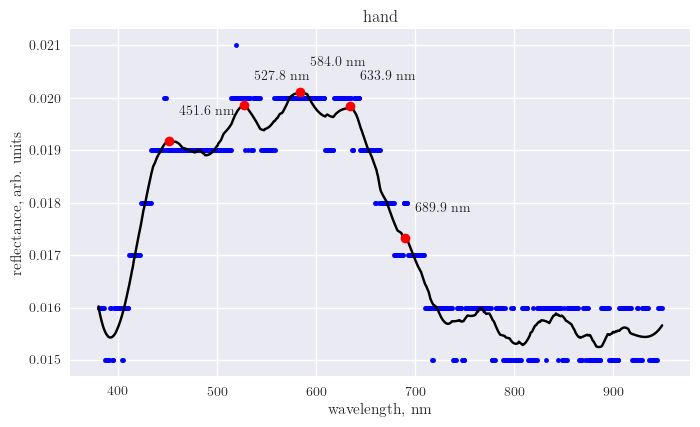

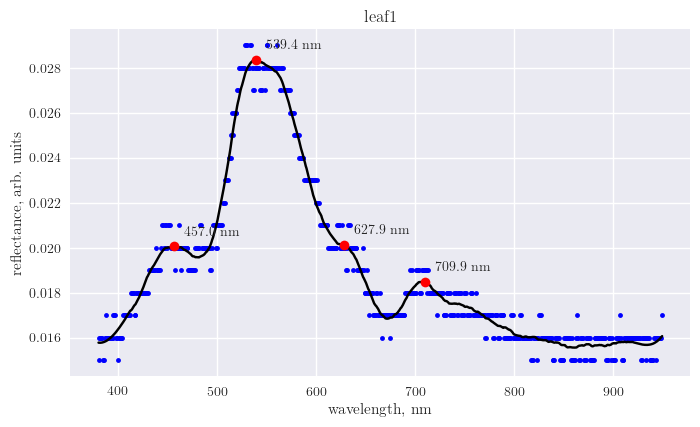

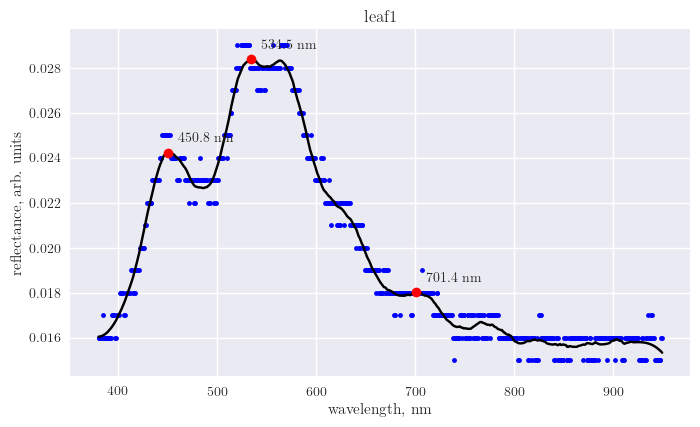

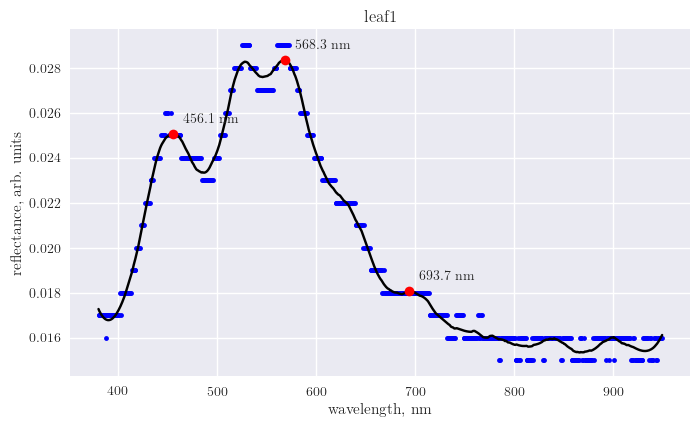

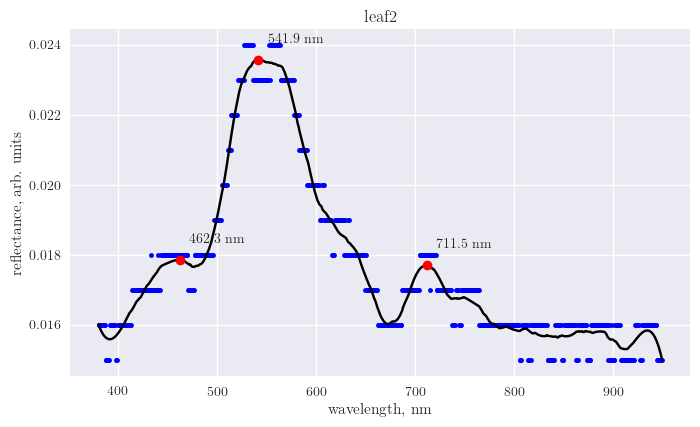

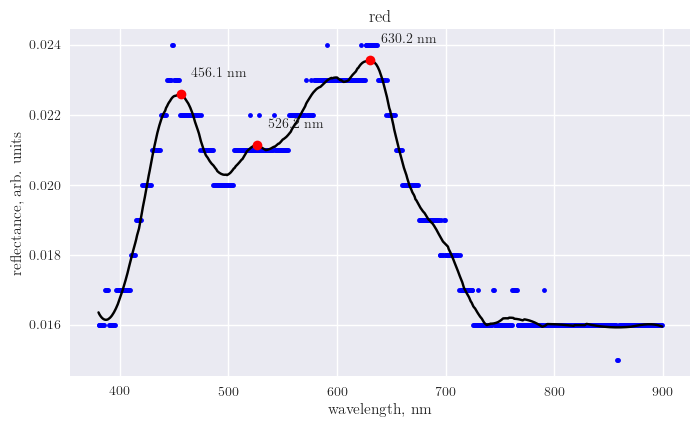

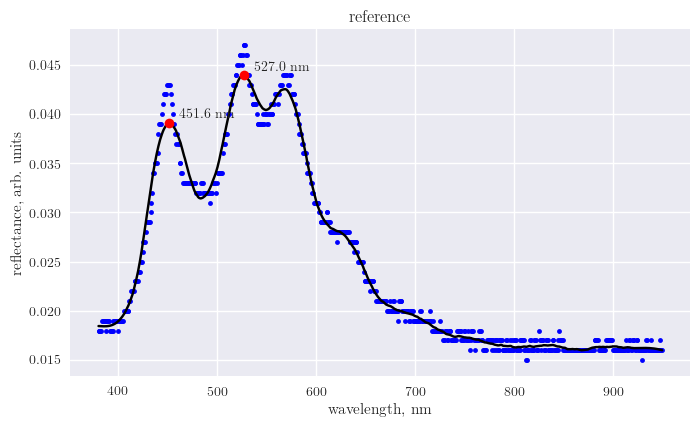

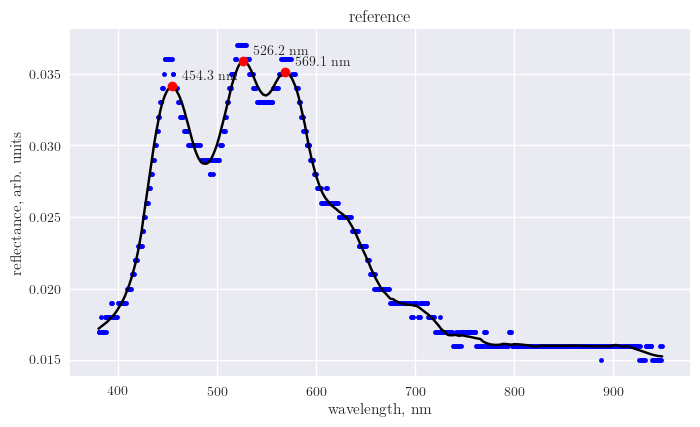

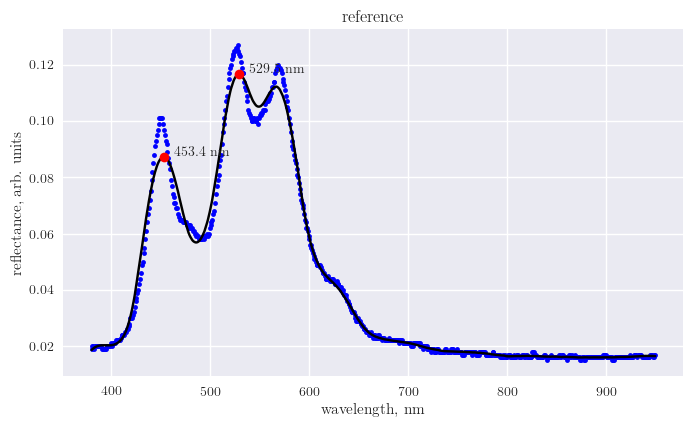

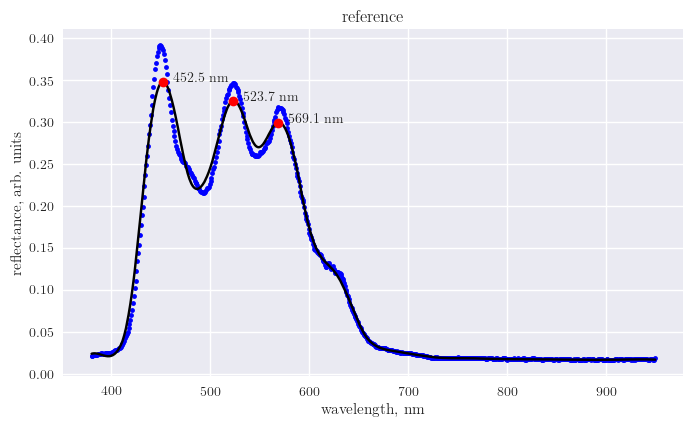

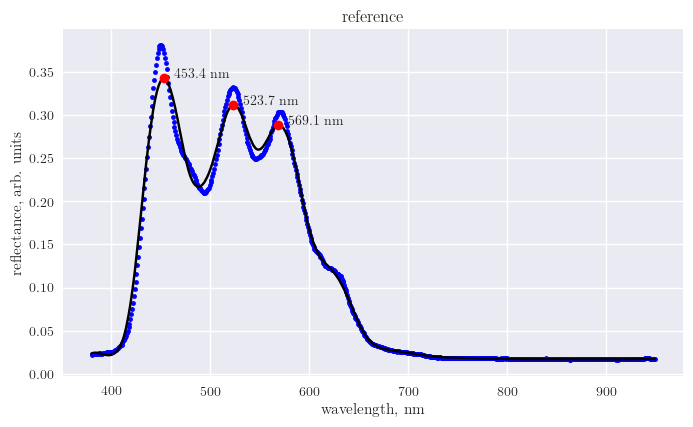

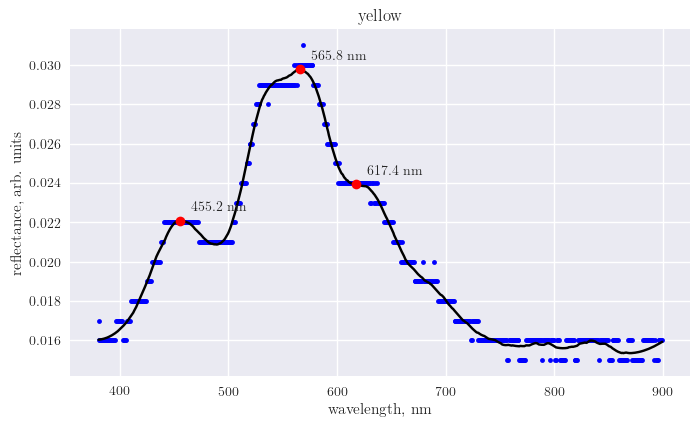

In [86]:
filenames = os.listdir()
count = 1
for f in filenames:
    if f.endswith('.txt'):
        data = np.genfromtxt(f, skip_header=4)
        wavelength, intensity = data.T
        int_profile = sig.savgol_filter(intensity, 71, 3)
        peaks = peak.indexes(np.array(int_profile), thres=0.2, min_dist=50)
        title = f.split('_')[0]
        mp.plot(wavelength, intensity, 'b.')
        mp.plot(wavelength, int_profile, 'k-')
        mp.plot(wavelength[peaks], int_profile[peaks], 'ro')
        for i,p in enumerate(peaks):
            mp.text(wavelength[p]+10, int_profile[p]+0.0005,
                    '{} nm'.format(str(wavelength[p])))
        mp.title(title)
        mp.xlabel('wavelength, nm')
        mp.ylabel('reflectance, arb. units')
        mp.savefig(title + str(count) + '.png', dpi=300, bbox_inches='tight')
        mp.show()
        count += 1